In [10]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [11]:
%%bash
cd .. && make clean && make

src/Ex3_2024.cpp:55:74: warning: unused parameter 't' [-Wunused-parameter]
   55 |         valarray<long double> get_f(const valarray<long double>& x, long double t) {
      |                                                                                 ^
1 warning generated.


In [12]:
config_name = 'lagrange2'
conf = load_conf(config_name)

In [13]:
tFin = 2 * 365 * 24 * 60 * 60
tFin

63072000

In [14]:
# Position Lagrange 2
G = 6.674e-11
d = 149.598023e9
ms = conf['m1']
mt = conf['m2']
xs = -mt * d / (mt + ms)
xt = ms * d / (mt + ms)
Omega = np.sqrt(G * ms / (d**2 * xt))
Omega2 = Omega**2

coefs = [
    Omega2,
    -2 * Omega2 * (xs+xt),
    Omega2 * ((xt + xs)**2 + 2 * xt * xs),
    -(G * (ms + mt) + 2 * Omega2 * xt * xs * (xt + xs)),
    2 * G * (ms * xt + mt * xs) + Omega2 * xt**2 * xs**2,
    -G * (ms * xt**2 + mt * xs**2)
]
roots = np.roots(coefs)
assert roots[2].imag == 0.0
L2x: float = roots[2].real

In [15]:
params, data = run_with_params(
    config_name,
    [{
        'tol': 1e-4,
        'adapt': 'true',
        'tFin': tFin,
    }],
)[0]

Running simulations... Done 1/1


# Plots!

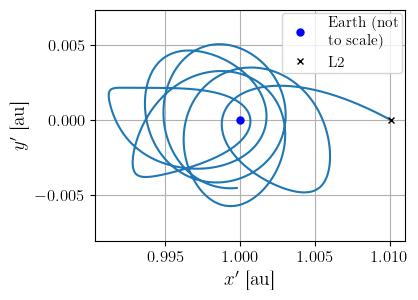

In [20]:
%matplotlib inline
au = 1.495978707e11  # m / au

t, x, y, vx, vy, emec, nsteps = [data[:,i] for i in range(7)]

plt.plot(x/au, y/au)
plt.plot(xt/au, 0, 'o', color='blue', label='Earth (not\nto scale)', markersize=5, zorder=2)
plt.plot(L2x/au, 0, 'x', color='black', label='L2', markersize=5, zorder=2)

plt.xlabel(r"$x'$ [au]")
plt.ylabel(r"$y'$ [au]")
plt.axis('equal')
plt.legend(borderpad=0.2, borderaxespad=0.2)
plt.grid()
plt.savefig(export_path + 'lagrange_trajectory.pdf')

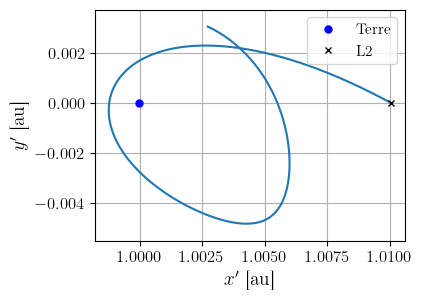

In [8]:
idx = 2000
plt.plot(x[:idx]/au, y[:idx]/au)
plt.plot(xt/au, 0, 'o', color='blue', label='Terre', markersize=5, zorder=2)
plt.plot(L2x/au, 0, 'x', color='black', label='L2', markersize=5, zorder=2)

plt.xlabel(r"$x'$ [au]")
plt.ylabel(r"$y'$ [au]")
plt.axis('equal')
plt.legend()
plt.grid()

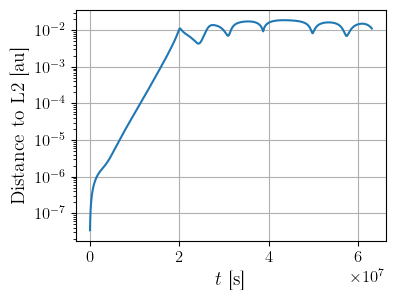

In [9]:
dist = np.linalg.norm(np.stack([(x[1:]-L2x)/au, y[1:]/au]), axis=0)

plt.semilogy(t[1:], dist)
plt.xlabel(r"$t$ [s]")
plt.ylabel(r"Distance to L2 [au]")
plt.grid()
plt.savefig(export_path + 'lagrange_exponential_distance.pdf')